# **Project UAS PPW**

## **Crawling Berita**
Perayapan data, atau data crawling adalah sebuah proses yang menggali jauh ke dalam world wide web atau target tertentu untuk mengambil data. Perayapan data juga didefinisikan sebagai proses otomatis untuk mengumpulkan dan mengindeks data dari berbagai sumber.

Crawling dilakukan pada website kompas.com. dengan mengambil data berita dengan 3 kategori sesuai keinginan user

Link website yang telah dibuat :


In [14]:
# Import Library
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib
import string

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def scraping_berita(halaman):

    kategori = ['entertainment', 'sport', 'bisnis']

    a = 1
    with open('berita_suara_entertaiment.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul_Artikel', 'Content_Artikel', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()

        # Looping untuk setiap kategori
        for kategori_terpilih in kategori:
            katakunci = kategori_terpilih

            for page in range(1, halaman + 1):
                url = f'https://www.suara.com/indeks/terkini/{kategori}/2023?page={page}'
                html = req.get(url).text
                soup = bs(html, 'lxml')
                list_berita = soup.find('div', class_='content mb-30 static')
                berita_list = list_berita.find_all('div', class_='item')

                for berita in berita_list:
                    link = berita.find('div', class_='text-list-item-y').find('a')['href']
                    headline = berita.find('div', class_='text-list-item-y').find('a').text
                    category = "Edukasi"

                    if (katakunci == 'entertainment'):
                      category = 'Entertaiment'
                    elif (katakunci == 'sport'):
                      category = 'Sports'
                    elif (katakunci == 'bisnis'):
                      category = 'Bisnis'

                    ge_berita = req.get(link).text
                    sop_berita = bs(ge_berita, 'lxml')
                    content_elem = sop_berita.find_all('article', class_='detail-content detail-berita')
                    content_list = [p.text for elem in content_elem for p in elem.find_all('p')]
                    artikel = '\n'.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').replace('\n', ' ').strip()

                    print(f'data berhasil diambil[{a}] > {headline[0:10]}')
                    a += 1

                    writer.writerow({'Judul_Artikel': headline, 'Content_Artikel': artikel, 'Category': category})

# pemanggilan fungsi dengan jumlah halaman yang di scraping
scraping_berita(18)

## **Data Preprocessing**

In [74]:
data = pd.read_csv('/content/drive/MyDrive/ppw/latihan/dataset/dataset_berita_suara.csv')
data

,Judul_Artikel,Content_Artikel,Category
0,\n Alam Ganjar dan Eca ...,"Suara.com - Kedekatan anak Ganjar Pranowo, Ala...",Entertainment
1,\n Profil dan Biodata S...,"Suara.com - Pacar Laura Meizani alias Lolly, V...",Entertainment
2,\n Nagita Slavina Pakai...,Suara.com - Kabar duka tengah menyelimuti kelu...,Entertainment
3,\n Bakal Dibintangi Bin...,Suara.com - Drakor baru bertajuk The 8 Show la...,Entertainment
4,\n Marcello Tahitoe Ung...,Suara.com - Marcello Tahitoe alias Ello mendap...,Entertainment
...,...,...,...
1075,\n BRI Semakin Fokus Te...,Suara.com - PT Bank Rakyat Indonesia (Persero)...,Bisnis
1076,\n Cara Beli Pulsa Telk...,Suara.com - BRImo merupakan aplikasi keuangan ...,Bisnis
1077,\n RELX Komitmen Kemban...,Suara.com - RELX berhasil meraih peringkat per...,Bisnis
1078,\n BRImo Memudahkan Bay...,Suara.com - BRImo adalah aplikasi mobile banki...,Bisnis


In [75]:
# Hitung jumlah kelas
kelas = data['Category'].value_counts()
kelas

Entertainment    360
Sports           360
Bisnis           360
Name: Category, dtype: int64

In [76]:
# Cek data kosong
data.isnull().sum()

Judul_Artikel      0
Content_Artikel    0
Category           0
dtype: int64

In [77]:
# Cek data duplicate
data.duplicated().sum()

1

In [78]:
# Hapus data duplicate
data_new = data.drop_duplicates(subset='Content_Artikel', keep='first')
data_new = data_new.reset_index(drop=True)
print(f'Jumlah data = {len(data_new)}')

Jumlah data = 1079


In [79]:
data_new

,Judul_Artikel,Content_Artikel,Category
0,\n Alam Ganjar dan Eca ...,"Suara.com - Kedekatan anak Ganjar Pranowo, Ala...",Entertainment
1,\n Profil dan Biodata S...,"Suara.com - Pacar Laura Meizani alias Lolly, V...",Entertainment
2,\n Nagita Slavina Pakai...,Suara.com - Kabar duka tengah menyelimuti kelu...,Entertainment
3,\n Bakal Dibintangi Bin...,Suara.com - Drakor baru bertajuk The 8 Show la...,Entertainment
4,\n Marcello Tahitoe Ung...,Suara.com - Marcello Tahitoe alias Ello mendap...,Entertainment
...,...,...,...
1074,\n BRI Semakin Fokus Te...,Suara.com - PT Bank Rakyat Indonesia (Persero)...,Bisnis
1075,\n Cara Beli Pulsa Telk...,Suara.com - BRImo merupakan aplikasi keuangan ...,Bisnis
1076,\n RELX Komitmen Kemban...,Suara.com - RELX berhasil meraih peringkat per...,Bisnis
1077,\n BRImo Memudahkan Bay...,Suara.com - BRImo adalah aplikasi mobile banki...,Bisnis


In [80]:
data_new.duplicated().sum()

0

### Clean data
Proses cleaning data digunakan untuk menghapus karakter tertentu dimana fungsi cleaning digunakan untuk membersihkan teks dalam kolom ‘Content_Artikel’. Ini menghapus karakter-karakter yang tidak relevan seperti tanda baca dan mengubah teks menjadi daftar kata-kata.

In [81]:
# membuat kolom baru dengan nama new_abstrak untuk data baru yang dipunctuation
data_new['clean_content'] = data_new['Content_Artikel'].str.replace('[{}]'.format(string.punctuation), '').str.lower()
# Menghilangkan angka dari kolom 'new_abstrak'
data_new['clean_content'] = data_new['clean_content'].str.replace('\d+', '', regex=True)
data_new['clean_content']

0       suaracom  kedekatan anak ganjar pranowo alam g...
1       suaracom  pacar laura meizani alias lolly vade...
2       suaracom  kabar duka tengah menyelimuti keluar...
3       suaracom  drakor baru bertajuk the  show langs...
4       suaracom  marcello tahitoe alias ello mendapat...
                              ...                        
1074    suaracom  pt bank rakyat indonesia persero tbk...
1075    suaracom  brimo merupakan aplikasi keuangan di...
1076    suaracom  relx berhasil meraih peringkat perta...
1077    suaracom  brimo adalah aplikasi mobile banking...
1078    suaracom  superindo masih bagibagi diskon prod...
Name: clean_content, Length: 1079, dtype: object

### Tokenizing
Fungsi tokenizer digunakan untuk melakukan tokenisasi dan juga proses case folding pada teks yang telah dibersihkan. Ini mengubah teks menjadi token-token kata.

In [82]:
def tokenizer(text):
  text = text.lower()
  return sent_tokenize(text)

data_new["tokenizing"] = data_new['clean_content'].apply(tokenizer)
data_new["tokenizing"]

0       [suaracom  kedekatan anak ganjar pranowo alam ...
1       [suaracom  pacar laura meizani alias lolly vad...
2       [suaracom  kabar duka tengah menyelimuti kelua...
3       [suaracom  drakor baru bertajuk the  show lang...
4       [suaracom  marcello tahitoe alias ello mendapa...
                              ...                        
1074    [suaracom  pt bank rakyat indonesia persero tb...
1075    [suaracom  brimo merupakan aplikasi keuangan d...
1076    [suaracom  relx berhasil meraih peringkat pert...
1077    [suaracom  brimo adalah aplikasi mobile bankin...
1078    [suaracom  superindo masih bagibagi diskon pro...
Name: tokenizing, Length: 1079, dtype: object

In [83]:
data_new

,Judul_Artikel,Content_Artikel,Category,clean_content,tokenizing
0,\n Alam Ganjar dan Eca ...,"Suara.com - Kedekatan anak Ganjar Pranowo, Ala...",Entertainment,suaracom kedekatan anak ganjar pranowo alam g...,[suaracom kedekatan anak ganjar pranowo alam ...
1,\n Profil dan Biodata S...,"Suara.com - Pacar Laura Meizani alias Lolly, V...",Entertainment,suaracom pacar laura meizani alias lolly vade...,[suaracom pacar laura meizani alias lolly vad...
2,\n Nagita Slavina Pakai...,Suara.com - Kabar duka tengah menyelimuti kelu...,Entertainment,suaracom kabar duka tengah menyelimuti keluar...,[suaracom kabar duka tengah menyelimuti kelua...
3,\n Bakal Dibintangi Bin...,Suara.com - Drakor baru bertajuk The 8 Show la...,Entertainment,suaracom drakor baru bertajuk the show langs...,[suaracom drakor baru bertajuk the show lang...
4,\n Marcello Tahitoe Ung...,Suara.com - Marcello Tahitoe alias Ello mendap...,Entertainment,suaracom marcello tahitoe alias ello mendapat...,[suaracom marcello tahitoe alias ello mendapa...
...,...,...,...,...,...
1074,\n BRI Semakin Fokus Te...,Suara.com - PT Bank Rakyat Indonesia (Persero)...,Bisnis,suaracom pt bank rakyat indonesia persero tbk...,[suaracom pt bank rakyat indonesia persero tb...
1075,\n Cara Beli Pulsa Telk...,Suara.com - BRImo merupakan aplikasi keuangan ...,Bisnis,suaracom brimo merupakan aplikasi keuangan di...,[suaracom brimo merupakan aplikasi keuangan d...
1076,\n RELX Komitmen Kemban...,Suara.com - RELX berhasil meraih peringkat per...,Bisnis,suaracom relx berhasil meraih peringkat perta...,[suaracom relx berhasil meraih peringkat pert...
1077,\n BRImo Memudahkan Bay...,Suara.com - BRImo adalah aplikasi mobile banki...,Bisnis,suaracom brimo adalah aplikasi mobile banking...,[suaracom brimo adalah aplikasi mobile bankin...


In [84]:
# menggabungkan kata
data_new['final_content'] = data_new['tokenizing'].apply(lambda x: ' '.join(x))
data_new

,Judul_Artikel,Content_Artikel,Category,clean_content,tokenizing,final_content
0,\n Alam Ganjar dan Eca ...,"Suara.com - Kedekatan anak Ganjar Pranowo, Ala...",Entertainment,suaracom kedekatan anak ganjar pranowo alam g...,[suaracom kedekatan anak ganjar pranowo alam ...,suaracom kedekatan anak ganjar pranowo alam g...
1,\n Profil dan Biodata S...,"Suara.com - Pacar Laura Meizani alias Lolly, V...",Entertainment,suaracom pacar laura meizani alias lolly vade...,[suaracom pacar laura meizani alias lolly vad...,suaracom pacar laura meizani alias lolly vade...
2,\n Nagita Slavina Pakai...,Suara.com - Kabar duka tengah menyelimuti kelu...,Entertainment,suaracom kabar duka tengah menyelimuti keluar...,[suaracom kabar duka tengah menyelimuti kelua...,suaracom kabar duka tengah menyelimuti keluar...
3,\n Bakal Dibintangi Bin...,Suara.com - Drakor baru bertajuk The 8 Show la...,Entertainment,suaracom drakor baru bertajuk the show langs...,[suaracom drakor baru bertajuk the show lang...,suaracom drakor baru bertajuk the show langs...
4,\n Marcello Tahitoe Ung...,Suara.com - Marcello Tahitoe alias Ello mendap...,Entertainment,suaracom marcello tahitoe alias ello mendapat...,[suaracom marcello tahitoe alias ello mendapa...,suaracom marcello tahitoe alias ello mendapat...
...,...,...,...,...,...,...
1074,\n BRI Semakin Fokus Te...,Suara.com - PT Bank Rakyat Indonesia (Persero)...,Bisnis,suaracom pt bank rakyat indonesia persero tbk...,[suaracom pt bank rakyat indonesia persero tb...,suaracom pt bank rakyat indonesia persero tbk...
1075,\n Cara Beli Pulsa Telk...,Suara.com - BRImo merupakan aplikasi keuangan ...,Bisnis,suaracom brimo merupakan aplikasi keuangan di...,[suaracom brimo merupakan aplikasi keuangan d...,suaracom brimo merupakan aplikasi keuangan di...
1076,\n RELX Komitmen Kemban...,Suara.com - RELX berhasil meraih peringkat per...,Bisnis,suaracom relx berhasil meraih peringkat perta...,[suaracom relx berhasil meraih peringkat pert...,suaracom relx berhasil meraih peringkat perta...
1077,\n BRImo Memudahkan Bay...,Suara.com - BRImo adalah aplikasi mobile banki...,Bisnis,suaracom brimo adalah aplikasi mobile banking...,[suaracom brimo adalah aplikasi mobile bankin...,suaracom brimo adalah aplikasi mobile banking...


## **Ekstraksi Fitur**
Menggunakan TF-IDF yaitu metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(data_new['final_content'])

# Membuat DataFrame dari hasil TF-IDF
tfidf_data_content = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Cetak DataFrame TF-IDF
tfidf_data_content

,aaa,aafihii,aahhh,aal,aaliah,aaliyah,aaliyahthorriqfans,aalthoryry,aamiin,aan,...,zulfarshah,zulhas,zulkarnaen,zulkifli,zulkili,zumarnis,zunaira,zuney,zuxian,zverev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# Menyimpan DataFrame ke dalam berkas CSV
tfidf_data_content.to_csv('tfidf_data_content.csv', index=False)

In [88]:
data_label = data['Category']
data_label

0       Entertainment
1       Entertainment
2       Entertainment
3       Entertainment
4       Entertainment
            ...      
1075           Bisnis
1076           Bisnis
1077           Bisnis
1078           Bisnis
1079           Bisnis
Name: Category, Length: 1080, dtype: object

In [89]:
data_tfidf = pd.concat([tfidf_data_content, data_label],axis=1)
data_tfidf

,aaa,aafihii,aahhh,aal,aaliah,aaliyah,aaliyahthorriqfans,aalthoryry,aamiin,aan,...,zulhas,zulkarnaen,zulkifli,zulkili,zumarnis,zunaira,zuney,zuxian,zverev,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bisnis
1076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bisnis
1077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bisnis
1078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bisnis


In [90]:
# Menghapus baris yang memiliki nilai NaN di semua kolom
data_tfidf.isna()
data_tfidf.dropna(subset='all', inplace=True)

In [91]:
data_tfidf

,aaa,aafihii,aahhh,aal,aaliah,aaliyah,aaliyahthorriqfans,aalthoryry,aamiin,aan,...,zulhas,zulkarnaen,zulkifli,zulkili,zumarnis,zunaira,zuney,zuxian,zverev,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bisnis
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bisnis
1076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bisnis
1077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bisnis


In [92]:
data_tfidf.to_csv('data_tfidf_split.csv', index=False)

## **LDA**
Latent Dirichlet Allocation (LDA) adalah model probabilistik generatif dari koleksi data diskrit seperti korpus teks. Ide dasarnya adalah bahwa dokumen direpresentasikan sebagai campuran acak atas topik laten (tidak terlihat). LDA merupakan model Bayesian hirarki tiga tingkat, di mana setiap item koleksi dimodelkan sebagai campuran terbatas atas serangkaian set topik. Setiap topik dimodelkan sebagai campuran tak terbatas melalui set yang mendasari probabilitas topik. Dalam konteks pembuatan model teks, probabilitas topik memberikan representasi eksplisit dari sebuah dokumen.

In [94]:
import numpy as np
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import os

In [95]:
#Train and Test split
X = data_tfidf.drop('Category', axis=1)
y = data_tfidf['Category']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
k = 4
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(X_train)
proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

,Topik 1,Topik 2,Topik 3,Topik 4
0,0.942972,0.019007,0.019007,0.019015
1,0.009234,0.009233,0.009233,0.972301
2,0.008585,0.008585,0.008585,0.974245
3,0.013755,0.013752,0.013752,0.958741
4,0.009960,0.009959,0.009959,0.970122
...,...,...,...,...
858,0.009916,0.009916,0.009916,0.970253
859,0.011602,0.011602,0.011602,0.965194
860,0.008141,0.760883,0.008140,0.222836
861,0.561238,0.010954,0.010954,0.416855


In [119]:
proporsi_topik_dokumen_df.to_csv('data_topik.csv', index=False)

In [111]:
data_topik = pd.concat([proporsi_topik_dokumen_df, data_label],axis=1)
data_topik

,Topik 1,Topik 2,Topik 3,Topik 4,Category
0,0.942972,0.019007,0.019007,0.019015,Entertainment
1,0.009234,0.009233,0.009233,0.972301,Entertainment
2,0.008585,0.008585,0.008585,0.974245,Entertainment
3,0.013755,0.013752,0.013752,0.958741,Entertainment
4,0.009960,0.009959,0.009959,0.970122,Entertainment
...,...,...,...,...,...
1075,NaN,NaN,NaN,NaN,Bisnis
1076,NaN,NaN,NaN,NaN,Bisnis
1077,NaN,NaN,NaN,NaN,Bisnis
1078,NaN,NaN,NaN,NaN,Bisnis


In [112]:
data_topik.isna()
data_topik.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Category'],inplace = True)
# Cek kembali nilai NaN
data_topik

,Topik 1,Topik 2,Topik 3,Topik 4,Category
0,0.942972,0.019007,0.019007,0.019015,Entertainment
1,0.009234,0.009233,0.009233,0.972301,Entertainment
2,0.008585,0.008585,0.008585,0.974245,Entertainment
3,0.013755,0.013752,0.013752,0.958741,Entertainment
4,0.009960,0.009959,0.009959,0.970122,Entertainment
...,...,...,...,...,...
858,0.009916,0.009916,0.009916,0.970253,Bisnis
859,0.011602,0.011602,0.011602,0.965194,Bisnis
860,0.008141,0.760883,0.008140,0.222836,Bisnis
861,0.561238,0.010954,0.010954,0.416855,Bisnis


In [120]:
# Menyimpan DataFrame ke dalam berkas CSV
data_topik.to_csv('data_topik_label.csv', index=False)

## **Modelling**

In [113]:
#Train and Test split
X_topik = data_topik.drop('Category', axis=1)
y_topik = data_topik['Category']
X_topik_train,X_topik_test,y_topik_train,y_topik_test= train_test_split(X_topik,y_topik,test_size=0.2,random_state=42)

In [114]:
from sklearn.ensemble import RandomForestClassifier
# Model RandomForest
model_rfc = RandomForestClassifier(n_estimators=100)
# Latih model
model_rfc.fit(X_topik_train, y_topik_train)
# Prediksi pada data uji
predictions = model_rfc.predict(X_topik_test)
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy_rfc = accuracy_score(y_topik_test, predictions)
print(f'Akurasi: {accuracy_rfc}')

Akurasi: 0.3872832369942196


In [118]:
# naive bayes
nb = GaussianNB()
nb.fit(X_topik_train, y_topik_train)
Y_prediction = nb.predict(X_topik_test)
accuracy_rf=round(accuracy_score(y_topik_test,Y_prediction)* 100, 2)
acc_nb = round(nb.score(X_topik_train, y_topik_train) * 100, 2)
print('akurasi nb', acc_nb)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_topik_train, y_topik_train)
Y_pred_knn = knn.predict(X_topik_test)
accuracy_knn=round(accuracy_score(y_topik_test,Y_pred_knn)* 100, 2)
acc_knn = round(knn.score(X_topik_train, y_topik_train) * 100, 2)

print('akurasi knn', acc_knn)

akurasi nb 42.32
akurasi knn 70.43


In [117]:
from sklearn import svm
C = 1.0
gamma = 0.1
kernel = 'rbf'
model_svm = svm.SVC(C=C, gamma=gamma, kernel=kernel)
model_svm.fit(X_topik_train, y_topik_train)
# Prediksi pada data uji
predictions = model_svm.predict(X_topik_test)
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
acc_svm = accuracy_score(y_topik_test, predictions)
print(f'Akurasi: {acc_svm}')

Akurasi: 0.4682080924855491


### Save Model

In [121]:
# Simpan Model
from sklearn import model_selection
import pickle

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_topik_train, y_topik_train)
# save the model to disk
filename = 'finalized_model_knn.pkl'
pickle.dump(knn, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# apply the whole pipeline to data
dataArray = [0.942972,	0.019007,	0.019007,	0.019015]
pred = loaded_model.predict([dataArray])
print('hasil prediksi masuk ke kelas = ',pred)

hasil prediksi masuk ke kelas =  ['Entertainment']


In [122]:
from sklearn import model_selection
import pickle
# Model RandomForest
model_rfc = RandomForestClassifier(n_estimators=100)
# Latih model
model_rfc.fit(X_topik_train, y_topik_train)

# save the model to disk
filename = 'finalized_model_randomforest.pkl'
pickle.dump(model_rfc, open(filename, 'wb'))

In [123]:
from sklearn import model_selection
import pickle
nb = GaussianNB()
nb.fit(X_topik_train, y_topik_train)

# save the model to disk
filename = 'model_naivebayes.pkl'
pickle.dump(nb, open(filename, 'wb'))

## **Evaluasi**

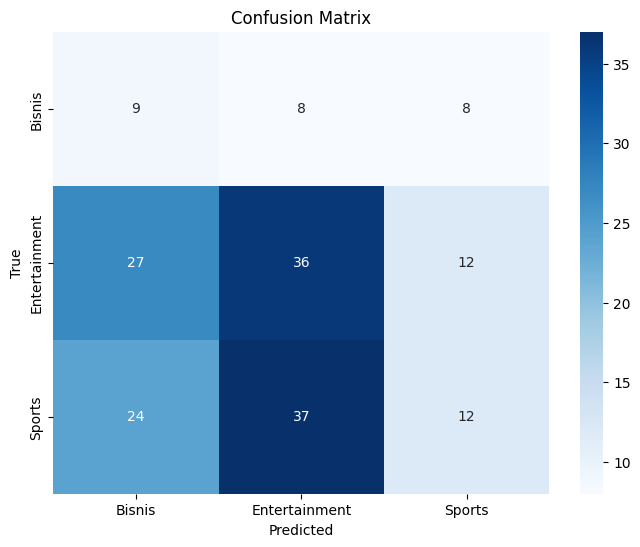

In [124]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_topik_test,Y_pred_knn)
plot_confusion_matrix(cm)